# 10

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%cd proseminar/10/mpi_omp_optimized_heat_stencil_2D/

/Users/chris/git/uni/uibk_parsys_19_solutions/proseminar/10/mpi_omp_optimized_heat_stencil_2D


### Prepare data

In [2]:
def getDataFor(path):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        return [[int(row[0]),int(row[1]), int(row[2]), float(row[3])] for row in csv_reader]

def sort(data):
    fData={}
    for elem in data:
        t = {"slots" : elem[0], "threads" : elem[1], "t" : elem[3]}
        if not elem[2] in fData:
            fData[elem[2]] = [t]
        else:
            fData.get(elem[2]).append(t)
    return fData

problemSizes = [100,200,400,800,1600]
data = sort(getDataFor('output.dat'))


### Speedup
- absolut: reference ts is the fastest sequential version
- relativ: reference ts is the fastest parallel version run sequentially
$$ speedup_p = \frac{t_s}{t_p} $$

### Efficency
$$ efficency = \frac{speedup_p}{p} $$

### Fixed number of threads, increasing number of slots with two different problem sizes

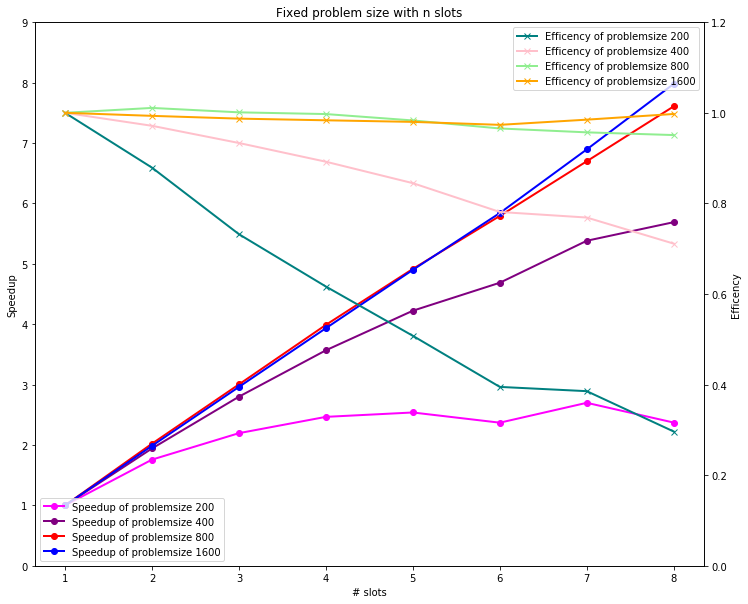

In [3]:
plt.rcParams["figure.figsize"] = (12,10)

def prepareData(data, problemSize):
    data = data[problemSize]
    singleThread = [d for d in data if d["threads"] == 1]
    reference = singleThread[0]["t"]

    def prepareData(data):
        slots = np.unique([d["slots"] for d in data])
        speedup = [reference/d["t"] for d in data]
        efficency = [speedup[i] / slots[i] for i in range(0,len(slots))]
        return{"slots":slots, "speedup":speedup, "efficency":efficency}
    return {"data":prepareData(singleThread), "problemSize":problemSize}

def plot(ax,ax2,data,c1,c2):
    problemsize=data["problemSize"]
    data = data["data"]
    ax.set_title("Fixed problem size with n slots")
    ax.set_xlabel('# slots')
    ax.set_ylabel('Speedup')
    ax.set_ylim(0,9)
    ax.plot(data["slots"],data["speedup"], label="Speedup of problemsize {}".format(problemsize) , marker='o',  linewidth=2, color=c1)
    ax2.plot(data["slots"],data["efficency"], label="Efficency of problemsize {}".format(problemsize), marker='x', linewidth=2, color=c2)
    ax2.set_ylabel("Efficency")
    ax2.set_ylim(0,1.2)
    ax2.legend()
    ax.legend(loc='lower left')

fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()

#hold the data for each problem size
finalData = {problemSize:prepareData(data, problemSize) for problemSize in problemSizes}
plot(ax,ax2,finalData[200],'magenta','teal') 
plot(ax,ax2,finalData[400],'purple','pink')   
plot(ax,ax2,finalData[800],'red','lightgreen')    
plot(ax,ax2,finalData[1600],'blue','orange')    

plt.show() 

### Fixed number of slot, increasing number of threads with two different problem sizes

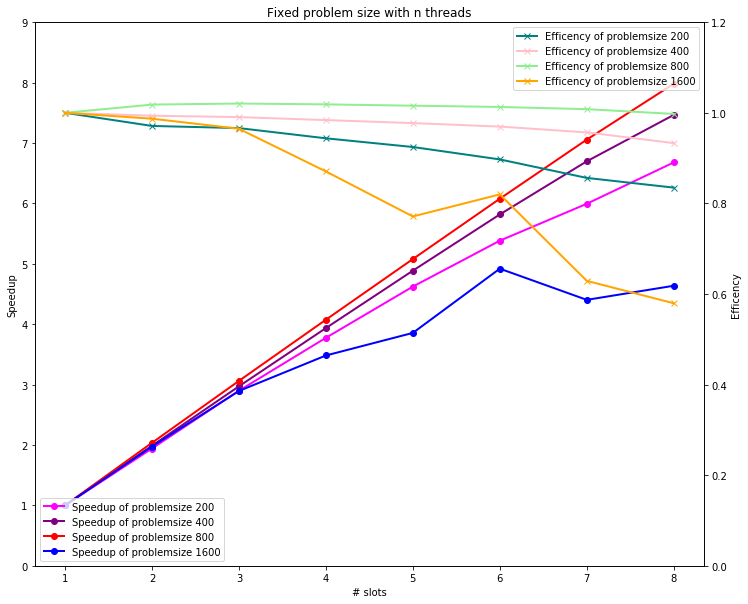

In [4]:
plt.rcParams["figure.figsize"] = (12,10)

def prepareData(data, problemSize):
    data = data[problemSize]
    singleSlot = [d for d in data if d["slots"] == 1]
    reference = singleSlot[0]["t"]

    def prepareData(data):
        threads = np.unique([d["threads"] for d in data])
        speedup = [reference/d["t"] for d in data]
        efficency = [speedup[i] / threads[i] for i in range(0,len(threads))]
        return{"threads":threads, "speedup":speedup, "efficency":efficency}
    return {"data":prepareData(singleSlot), "problemSize":problemSize}


def plot(ax,ax2,data,c1,c2):
    problemsize=data["problemSize"]
    data = data["data"]
    ax.set_title("Fixed problem size with n threads")
    ax.set_xlabel('# slots')
    ax.set_ylabel('Speedup')
    ax.set_ylim(0,9)
    ax.plot(data["threads"],data["speedup"], label="Speedup of problemsize {}".format(problemsize) , marker='o',  linewidth=2, color=c1)
    ax2.plot(data["threads"],data["efficency"], label="Efficency of problemsize {}".format(problemsize), marker='x', linewidth=2, color=c2)
    ax2.set_ylabel("Efficency")
    ax2.set_ylim(0,1.2)
    ax2.legend()
    ax.legend(loc='lower left')


fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()

#hold the data for each problem size
finalData = {problemSize:prepareData(data, problemSize) for problemSize in problemSizes}
plot(ax,ax2,finalData[200],'magenta','teal') 
plot(ax,ax2,finalData[400],'purple','pink') 
plot(ax,ax2,finalData[800],'red','lightgreen')  
plot(ax,ax2,finalData[1600],'blue','orange')    
plt.show() 

### Increasing number of threads and slots with two different problem sizes

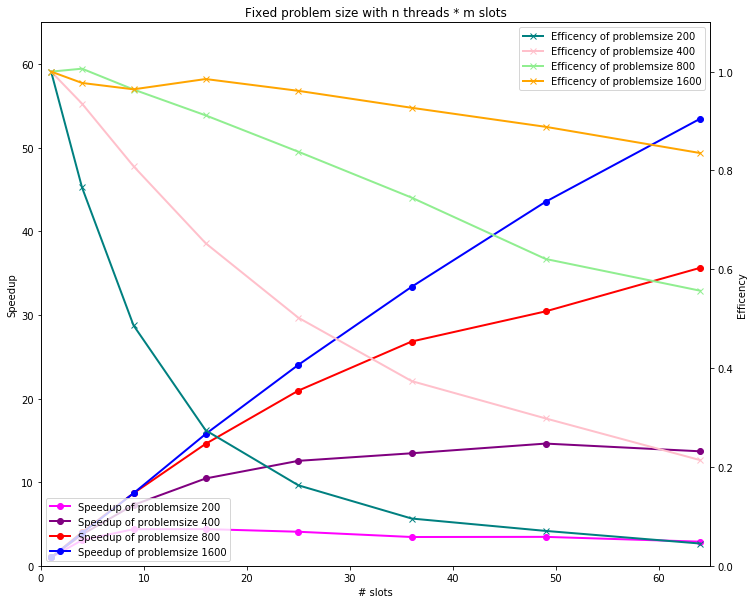

In [5]:
def prepareData(data, problemSize):
    data = data[problemSize]
    reference = data[0]["t"]
    similar = [d for d in data if d["slots"] == d["threads"]]
    def prepareData(data):
        operations = [d["threads"] * d["slots"] for d in data]
        speedup = [reference/d["t"] for d in data]
        efficency = [speedup[i] / operations[i] for i in range(0,len(operations))]
        return{"operations":operations, "speedup":speedup, "efficency":efficency}
    return {"data":prepareData(similar), "problemSize":problemSize}


def plot(ax,ax2,data,c1,c2):
    problemsize=data["problemSize"]
    data = data["data"]
    ax.set_title("Fixed problem size with n threads * m slots")
    ax.set_xlabel('# slots')
    ax.set_ylabel('Speedup')
    ax.set_ylim(0,65)
    ax.set_xlim(0,65)
    ax.plot(data["operations"],data["speedup"], label="Speedup of problemsize {}".format(problemsize) , marker='o',  linewidth=2, color=c1)
    ax2.plot(data["operations"],data["efficency"], label="Efficency of problemsize {}".format(problemsize), marker='x', linewidth=2, color=c2)
    ax2.set_ylabel("Efficency")
    ax2.set_ylim(0,1.1)
    ax2.legend()
    ax.legend(loc='lower left')


fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()
#hold the data for each problem size
finalData = {problemSize:prepareData(data, problemSize) for problemSize in problemSizes}
plot(ax,ax2,finalData[200],'magenta','teal') 
plot(ax,ax2,finalData[400],'purple','pink') 
plot(ax,ax2,finalData[800],'red','lightgreen')  
plot(ax,ax2,finalData[1600],'blue','orange')    
plt.show() 